In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

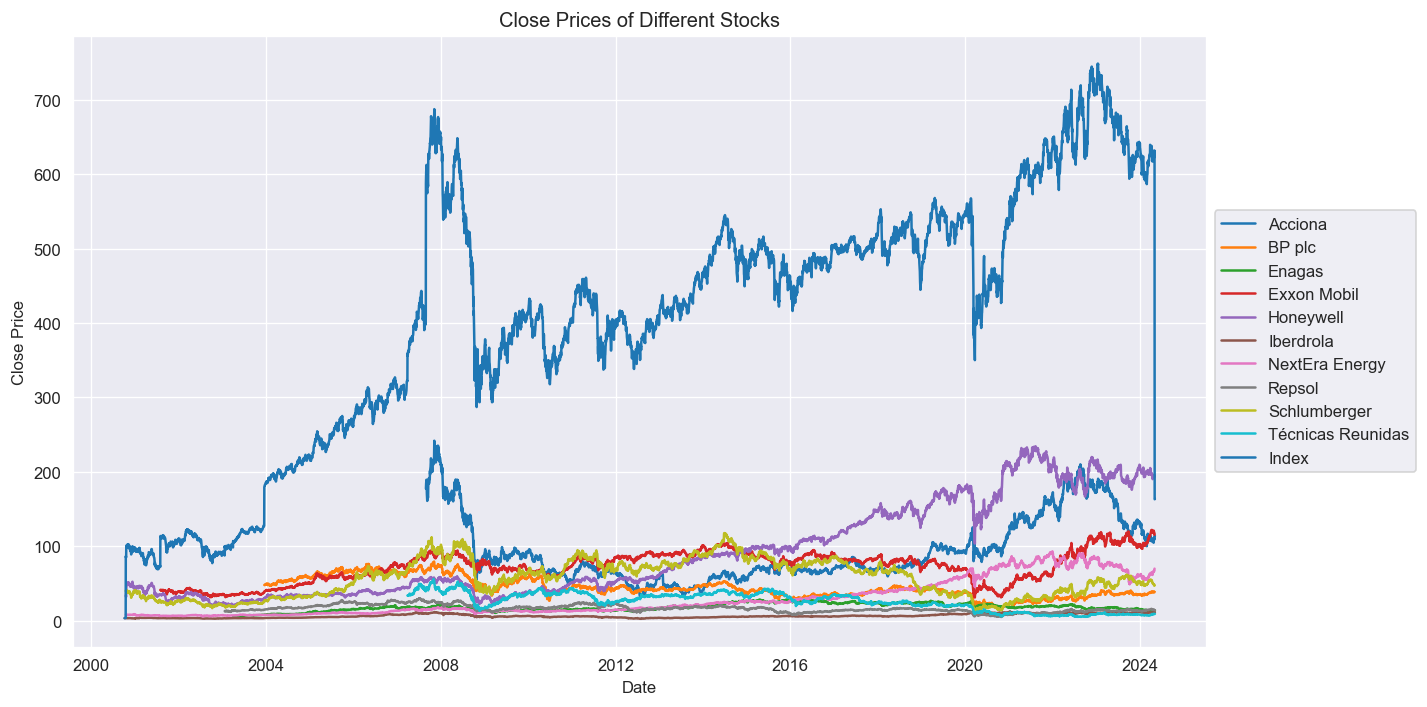

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de archivos CSV y sus nombres representativos
csv_files = [
    ('Acciona_data.csv', 'Acciona'), 
    ('BP plc_data.csv', 'BP plc'), 
    ('Enagas_data.csv', 'Enagas'), 
    ('Exxon Mobil Corporation_data.csv', 'Exxon Mobil'),  
    ('Honeywell International Inc._data.csv', 'Honeywell'),
    ('Iberdrola_data.csv', 'Iberdrola'), 
    ('NextEra Energy, Inc._data.csv', 'NextEra Energy'), 
    ('Repsol_data.csv', 'Repsol'), 
    ('Schlumberger Limited_data.csv', 'Schlumberger'), 
    ('Técnicas Reunidas_data.csv', 'Técnicas Reunidas'),
    ('index.csv', 'Index')
]

# Ruta base donde se encuentran los archivos CSV
base_path = '../docs/'

# Lista para almacenar los DataFrames
dataframes = []

for file_name, label in csv_files:
    # Cargar los datos
    file_path = base_path + file_name
    data = pd.read_csv(file_path, low_memory=False)
    
    # Convertir la columna 'Date' al tipo datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Establecer la columna 'Date' como índice
    data = data.set_index('Date')
    
    # Generar un rango de fechas completo
    date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
    date_range_df = pd.DataFrame(index=date_range)
    
    # Unir el rango de fechas completo con el DataFrame original
    data = pd.merge(date_range_df, data, left_index=True, right_index=True, how='left')
    
    # Interpolar los valores NaN utilizando el método 'linear'
    data = data.interpolate(method='linear')
    
    # Asegurarse de que los datos están ordenados por la columna 'Date'
    data = data.sort_index()
    
    # Añadir el DataFrame a la lista
    dataframes.append((data, label))

# Combinar todos los DataFrames en uno solo y sumar los valores para cada fecha
combined_data = pd.concat([df for df, label in dataframes]).groupby(level=0).sum()

# Generar un rango de fechas completo
date_range = pd.date_range(start=combined_data.index.min(), end=combined_data.index.max(), freq='D')

# Crear un DataFrame con el rango de fechas completo
date_range_df = pd.DataFrame(index=date_range)

# Unir el rango de fechas completo con el DataFrame combinado
combined_data = pd.merge(date_range_df, combined_data, left_index=True, right_index=True, how='left')

# Interpolar los valores NaN utilizando el método 'linear'
combined_data = combined_data.interpolate(method='linear')

# Guardar el DataFrame resultante en un archivo CSV
combined_data.to_csv('../docs/index.csv')

# Graficar los datos
plt.figure(figsize=(12, 6))
for df, label in dataframes:
    plt.plot(df.index, df['Close'], label=label)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of Different Stocks')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


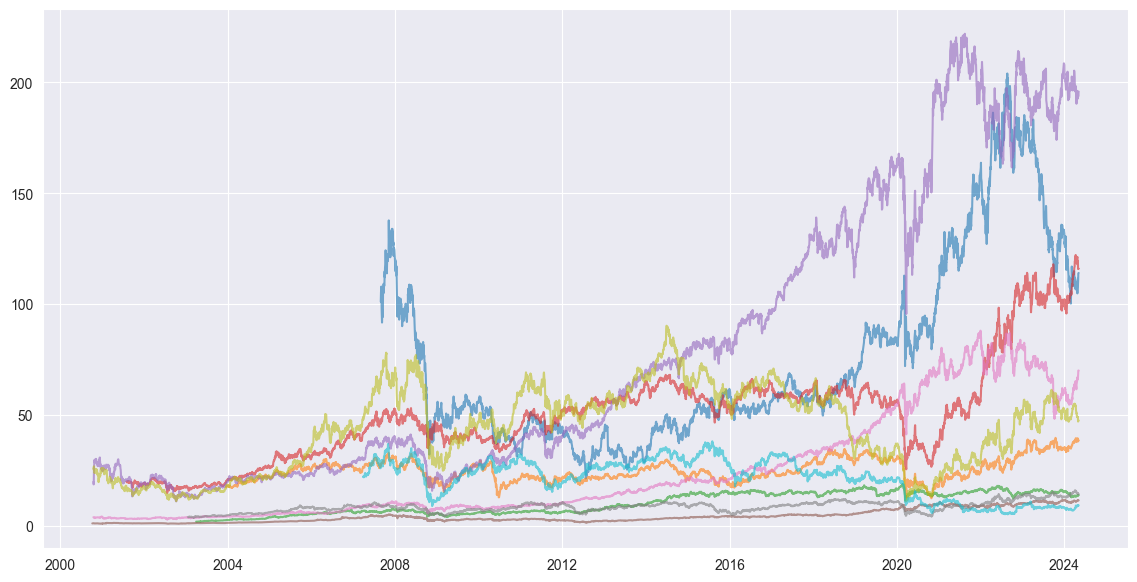

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de archivos CSV
csv_files = [
    'Acciona_data.csv', 
    'BP plc_data.csv', 
    'Enagas_data.csv', 
    'Exxon Mobil Corporation_data.csv',  
    'Honeywell International Inc._data.csv',
    'Iberdrola_data.csv', 
    'NextEra Energy, Inc._data.csv', 
    'Repsol_data.csv', 
    'Schlumberger Limited_data.csv', 
    'Técnicas Reunidas_data.csv'
]

# Ruta base donde se encuentran los archivos CSV
base_path = '../docs/'

# Lista para almacenar los DataFrames
dataframes = []

for file_name in csv_files:
    # Cargar los datos
    file_path = base_path + file_name
    data = pd.read_csv(file_path, low_memory=False)
    
    # Convertir la columna 'Date' al tipo datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Establecer la columna 'Date' como índice
    data = data.set_index('Date')
    
    # Asegurarse de que los datos están ordenados por la columna 'Date'
    data = data.sort_index()
    
    # Seleccionar solo la columna 'Adj Close'
    data = data[['Adj Close']]
    
    # Renombrar la columna para evitar colisiones al concatenar
    data.columns = [file_name.split('_')[0]]
    
    # Añadir el DataFrame a la lista
    dataframes.append(data)

# Combinar todos los DataFrames en uno solo, alineándolos por el índice de fecha
combined_data = pd.concat(dataframes, axis=1)

# Crear el rango de fechas desde la fecha mínima hasta la fecha máxima en el DataFrame combinado
date_range = pd.date_range(start=combined_data.index.min(), end=combined_data.index.max(), freq='D')

# Crear un DataFrame con el rango de fechas
date_range_df = pd.DataFrame(index=date_range)

# Hacer el merge del DataFrame combinado con el DataFrame del rango de fechas
combined_data = pd.merge(date_range_df, combined_data, left_index=True, right_index=True, how='left')

# Interpolar los valores NaN
combined_data = combined_data.interpolate(method='linear')

# Calcular la media de los valores para cada columna por fecha
average_data = combined_data.sum(axis=1)

# Plotear las gráficas
plt.figure(figsize=(14, 7))

combined_data.head(123213)
# Plotear cada acción
for column in combined_data.columns:
    plt.plot(combined_data.index, combined_data[column], label=column, alpha=0.6)

# Plotear el índice promedio
plt.plot(average_data.index, average_data, label='PSA Index', linewidth=3, color='black')

# Configurar la gráfica
plt.title('Stock Prices and Average Index')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


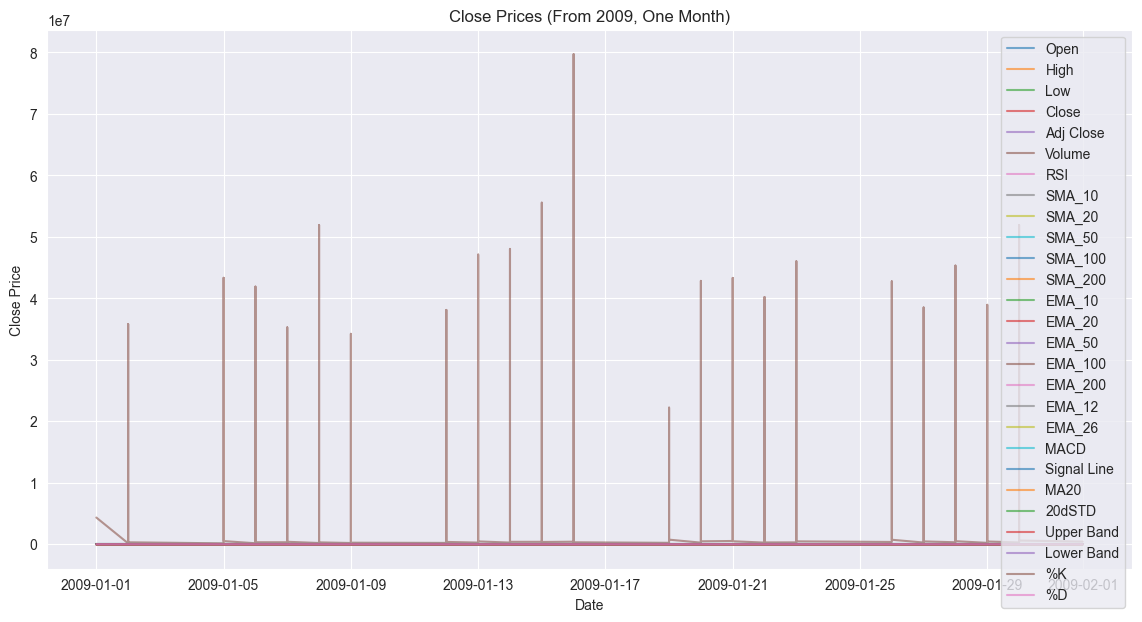

In [7]:
# Filtrar los datos a partir de 2009 y un mes
start_date = '2009-01-01'
end_date = pd.to_datetime(start_date) + pd.DateOffset(months=1)
filtered_data_close = combined_data.loc[start_date:end_date]

# Plotear la gráfica
plt.figure(figsize=(14, 7))

# Plotear cada acción
for column in filtered_data_close.columns:
    plt.plot(filtered_data_close.index, filtered_data_close[column], label=column, alpha=0.6)

# Configurar la gráfica
plt.title('Close Prices (From 2009, One Month)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Definir la fecha de corte
fecha_limite = pd.Timestamp('2008-01-01')

# Inicializar una lista para almacenar las acciones que no tienen valores antes de 2008
acciones_sin_datos_antes_2008 = []

# Iterar sobre cada DataFrame y verificar si tienen valores antes de 2008
for df in dataframes:
    # Obtener el índice mínimo del DataFrame actual
    fecha_minima = df.index.min()
    # Verificar si la fecha mínima es posterior a la fecha límite
    if fecha_minima >= fecha_limite:
        acciones_sin_datos_antes_2008.append(df.columns[0])  # Agregar la acción a la lista

# Imprimir las acciones que no tienen valores antes de 2008
print("Acciones sin datos antes de 2008:")
for action in acciones_sin_datos_antes_2008:
    print(action)


Acciones sin datos antes de 2008:


In [1]:
from stoks_view import app
app.run_server(mode='inline', debug=True)

C:\Users\pablo\Desktop\DATA SCIENCE COURSE\Finance_EDA\notebooks\stoks_view.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\pablo\Desktop\DATA SCIENCE COURSE\Finance_EDA\notebooks\stoks_view.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


AssertionError: The setup method 'errorhandler' can no longer be called on the application. It has already handled its first request, any changes will not be applied consistently.
Make sure all imports, decorators, functions, etc. needed to set up the application are done before running it.